# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [11]:
# Load pickled data
import pickle
import os
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data

training_file = "D:/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/train.p"
validation_file = "D:/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/valid.p"
testing_file = "D:/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/test.p"

# training_file = "./traffic-signs-data/train.p"
# validation_file = "./traffic-signs-data/valid.p"
# testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import pandas as pd

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = pd.unique(pd.Series(y_train)).size

print("Number of training examples =", n_train)
print("Number of validing examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validing examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

def show_one_class_images(images,lables,oneclass,cmap=None):
    cols = 15
    totshowimage = images[lables == oneclass]
    sumclass = len(totshowimage)
    if sumclass > 50:
        sumclass=50
    rows = (sumclass+cols-1)//cols 
#     print("Random show each class from data set:")
    
    plt.figure(figsize=(30, 20))
    for i in range(sumclass):
        plt.subplot(rows, cols, i+1)
        showimage = totshowimage[np.random.randint(len(totshowimage))].astype(np.uint8)
         # use gray scale color map if there is only one channel   
        showimage_shape = showimage.shape
        
        if len(showimage_shape) == 2: 
            cmap = "gray"
        elif  showimage_shape[2] == 1:
            showimage = showimage[:,:,0]
            cmap = "gray"
            
        plt.imshow(showimage,cmap=cmap)
        plt.title(oneclass,fontsize=30,fontweight='bold')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

# show each class
def show_class_images(images,lables,sumclass,cmap=None):
    cols = 10
    rows = (sumclass+cols-1)//cols 
#     print("Random show each class from data set:")
    
    plt.figure(figsize=(40, 30))
    for i in range(sumclass):
        plt.subplot(rows, cols, i+1)
        labelmarkimg = images[lables == i]
        #random show one image
        showimage = labelmarkimg[np.random.randint(len(labelmarkimg))].astype(np.uint8)
         # use gray scale color map if there is only one channel   
        showimage_shape = showimage.shape
        
        if len(showimage_shape) == 2: 
            cmap = "gray"
        elif  showimage_shape[2] == 1:
            showimage = showimage[:,:,0]
            cmap = "gray"
            
        plt.imshow(showimage,cmap=cmap)
        plt.title(i,fontsize=50,fontweight='bold')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

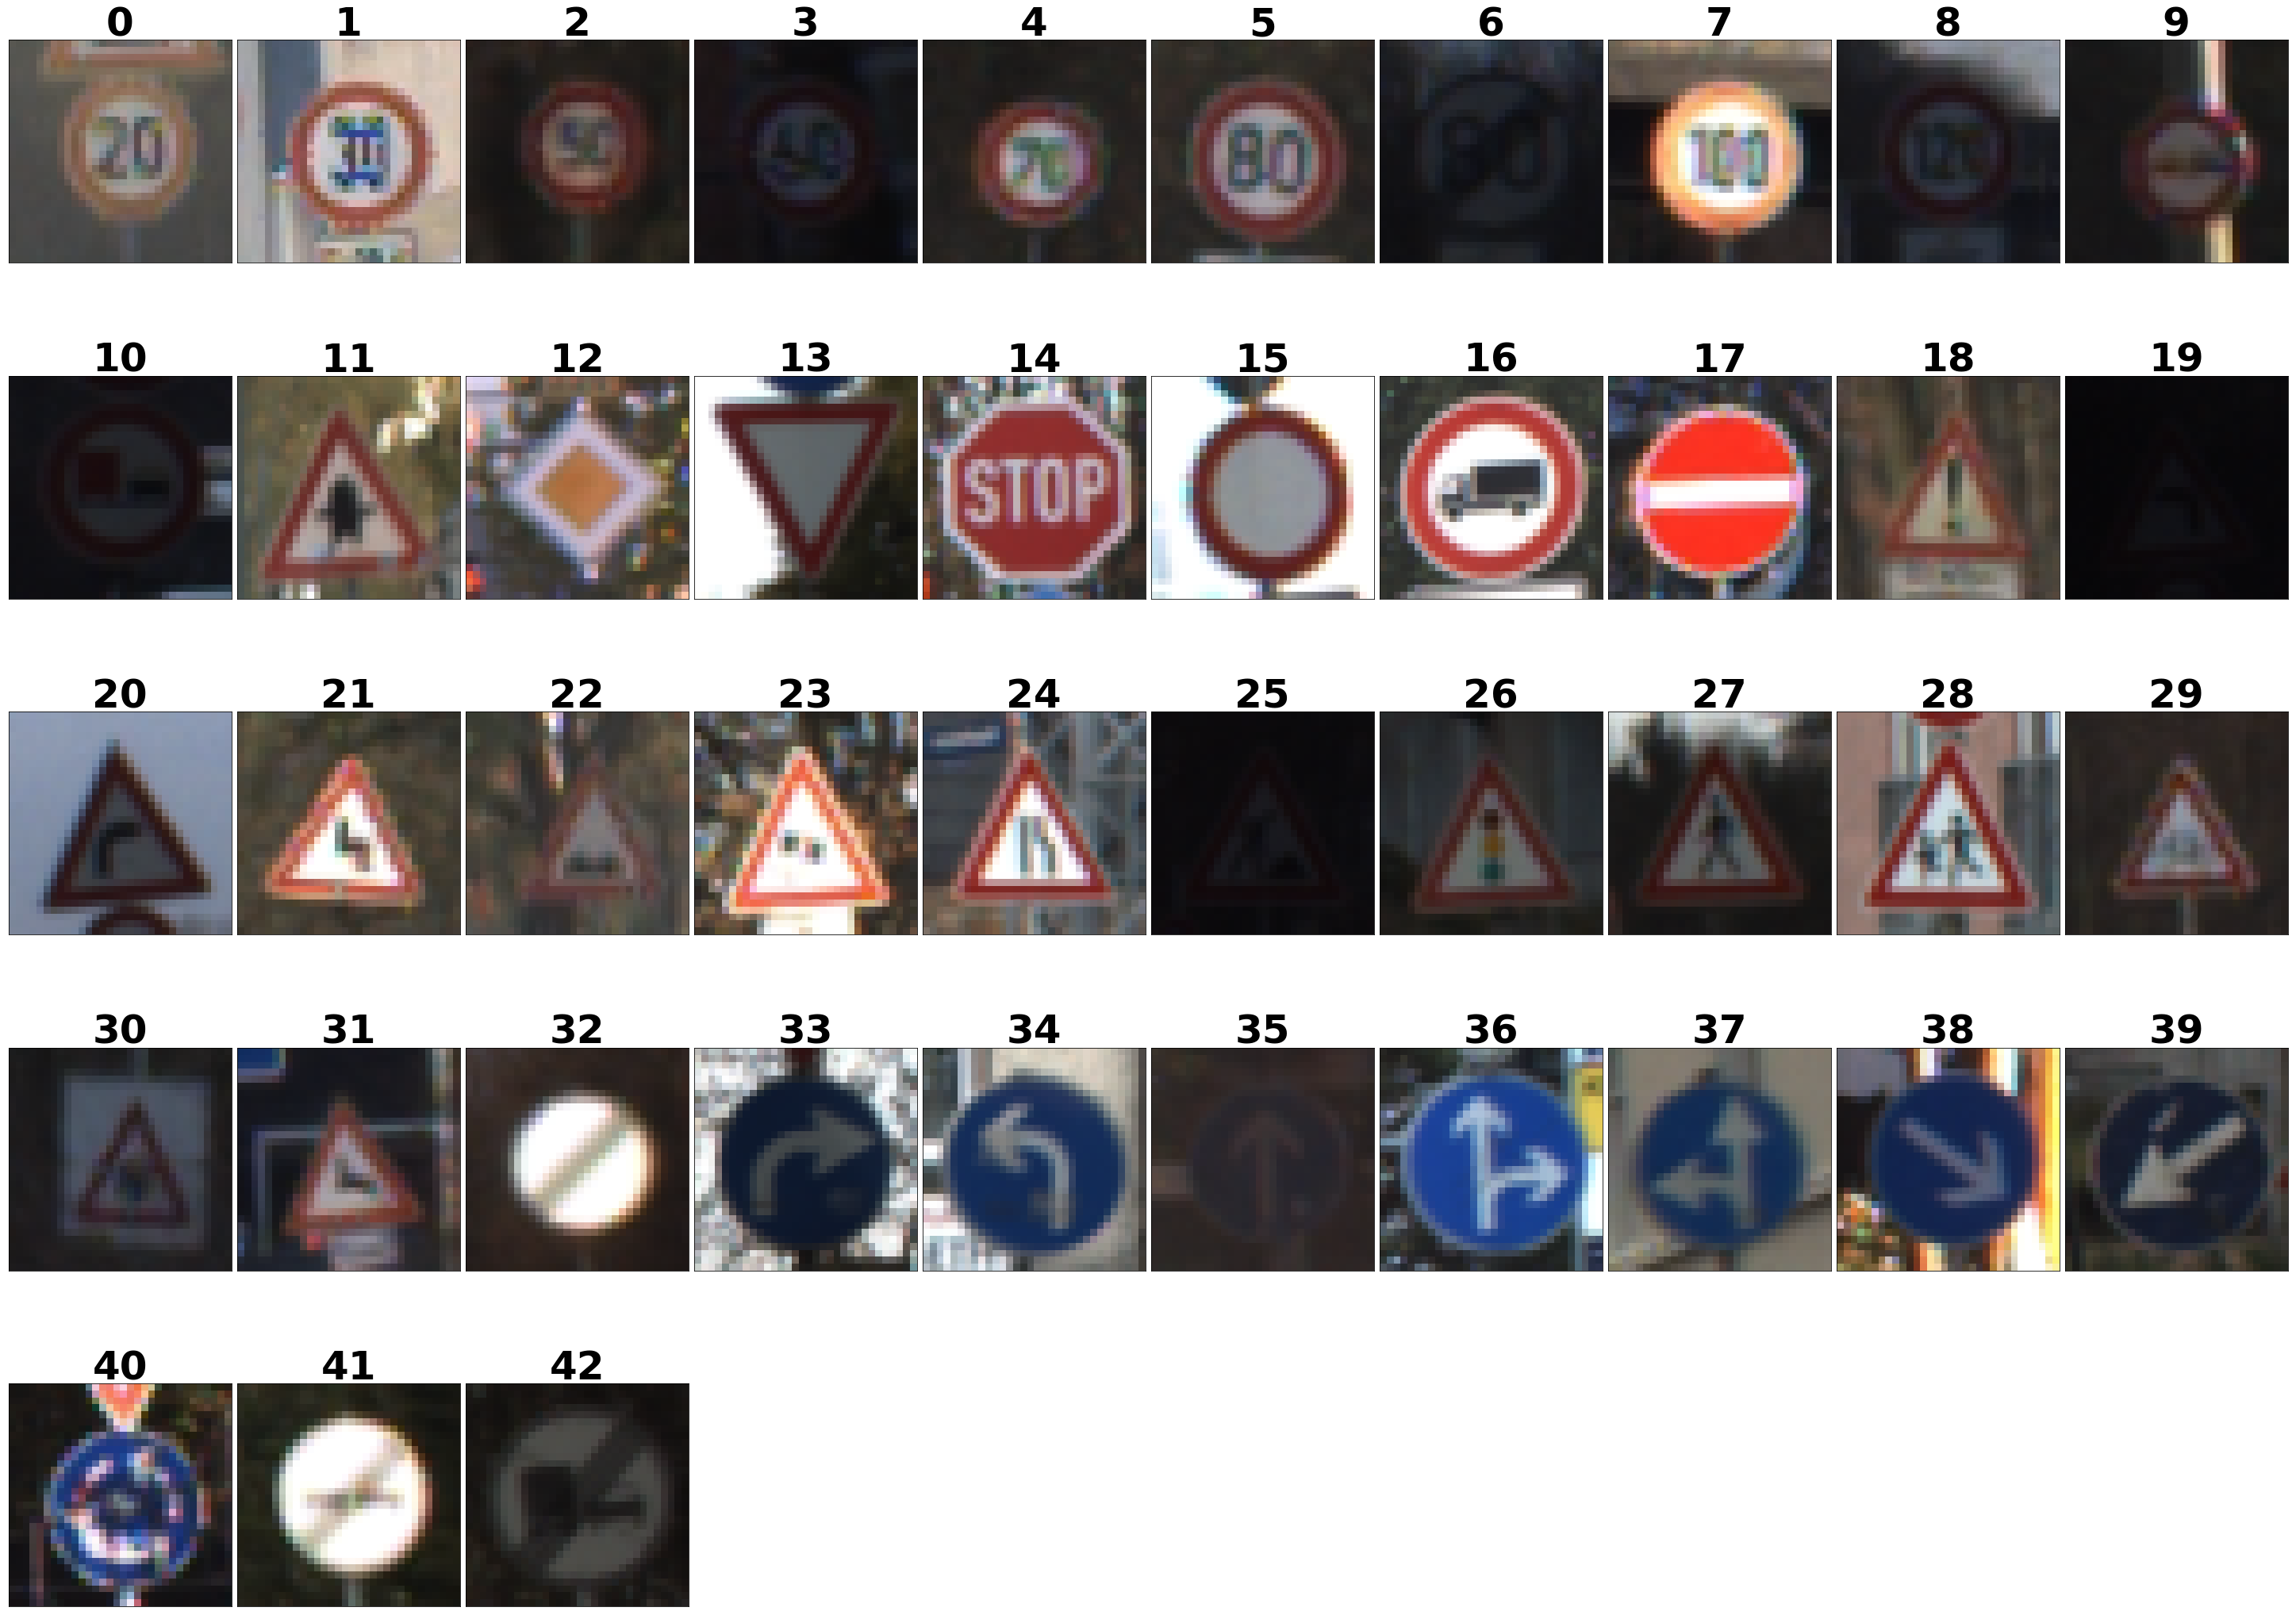

In [4]:
show_class_images(X_train,y_train,n_classes)
# show_class_images(X_valid,y_valid,n_classes)
# show_class_images(X_test,y_test,n_classes)
# show_one_class_images(X_train,y_train,1)

In [5]:
# histogram of label frequency
# show each class
def coun_single_images(trainlabel,sumclass):
    hist_train, bins_train = np.histogram(trainlabel, bins=sumclass)
    width = 0.8 * (bins_train[1] - bins_train[0])
    #adjust center location 1.96
    center = (bins_train[:-1] + bins_train[1:]) / 1.96
    plt.figure(figsize=(15,5)) 
    l1 = plt.bar(center-width/2, hist_train, align='center', width=width)
    plt.xticks(np.arange(0, sumclass, 1) )
    plt.show()
    
def coun_class_images(trainlabel,testlabel,sumclass):
    hist_train, bins_train = np.histogram(trainlabel, bins=sumclass)
    hist_test, bins_test = np.histogram(testlabel, bins=sumclass)
    width = 0.5 * (bins_train[1] - bins_train[0])
    #adjust center location 1.96
    center = (bins_train[:-1] + bins_train[1:]) / 1.96
    plt.figure(figsize=(15,5)) 
    l1 = plt.bar(center-width, hist_train, align='center', width=width)
    l2 = plt.bar(center, hist_test, align='center', width=width)
    plt.legend((l1, l2), ('train set', 'test set'))
    plt.xticks(np.arange(0, sumclass, 1) )
    plt.show()

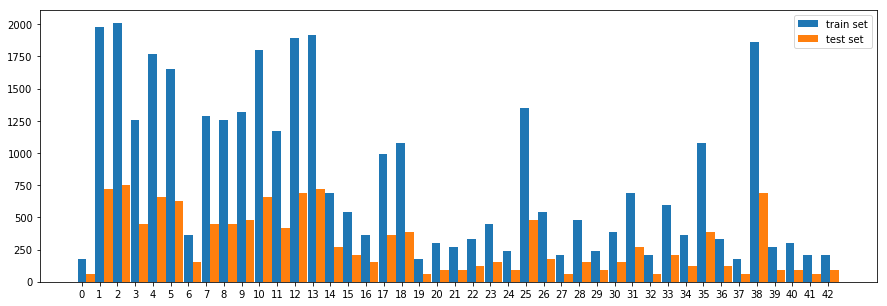

In [12]:
# coun_single_images(y_test,n_classes)
coun_class_images(y_train,y_test,n_classes)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Generate fake data to balance image numbers of  per label

Using TensorFlow backend.


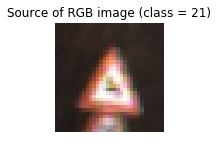

Generating of RGB image (class = 21)


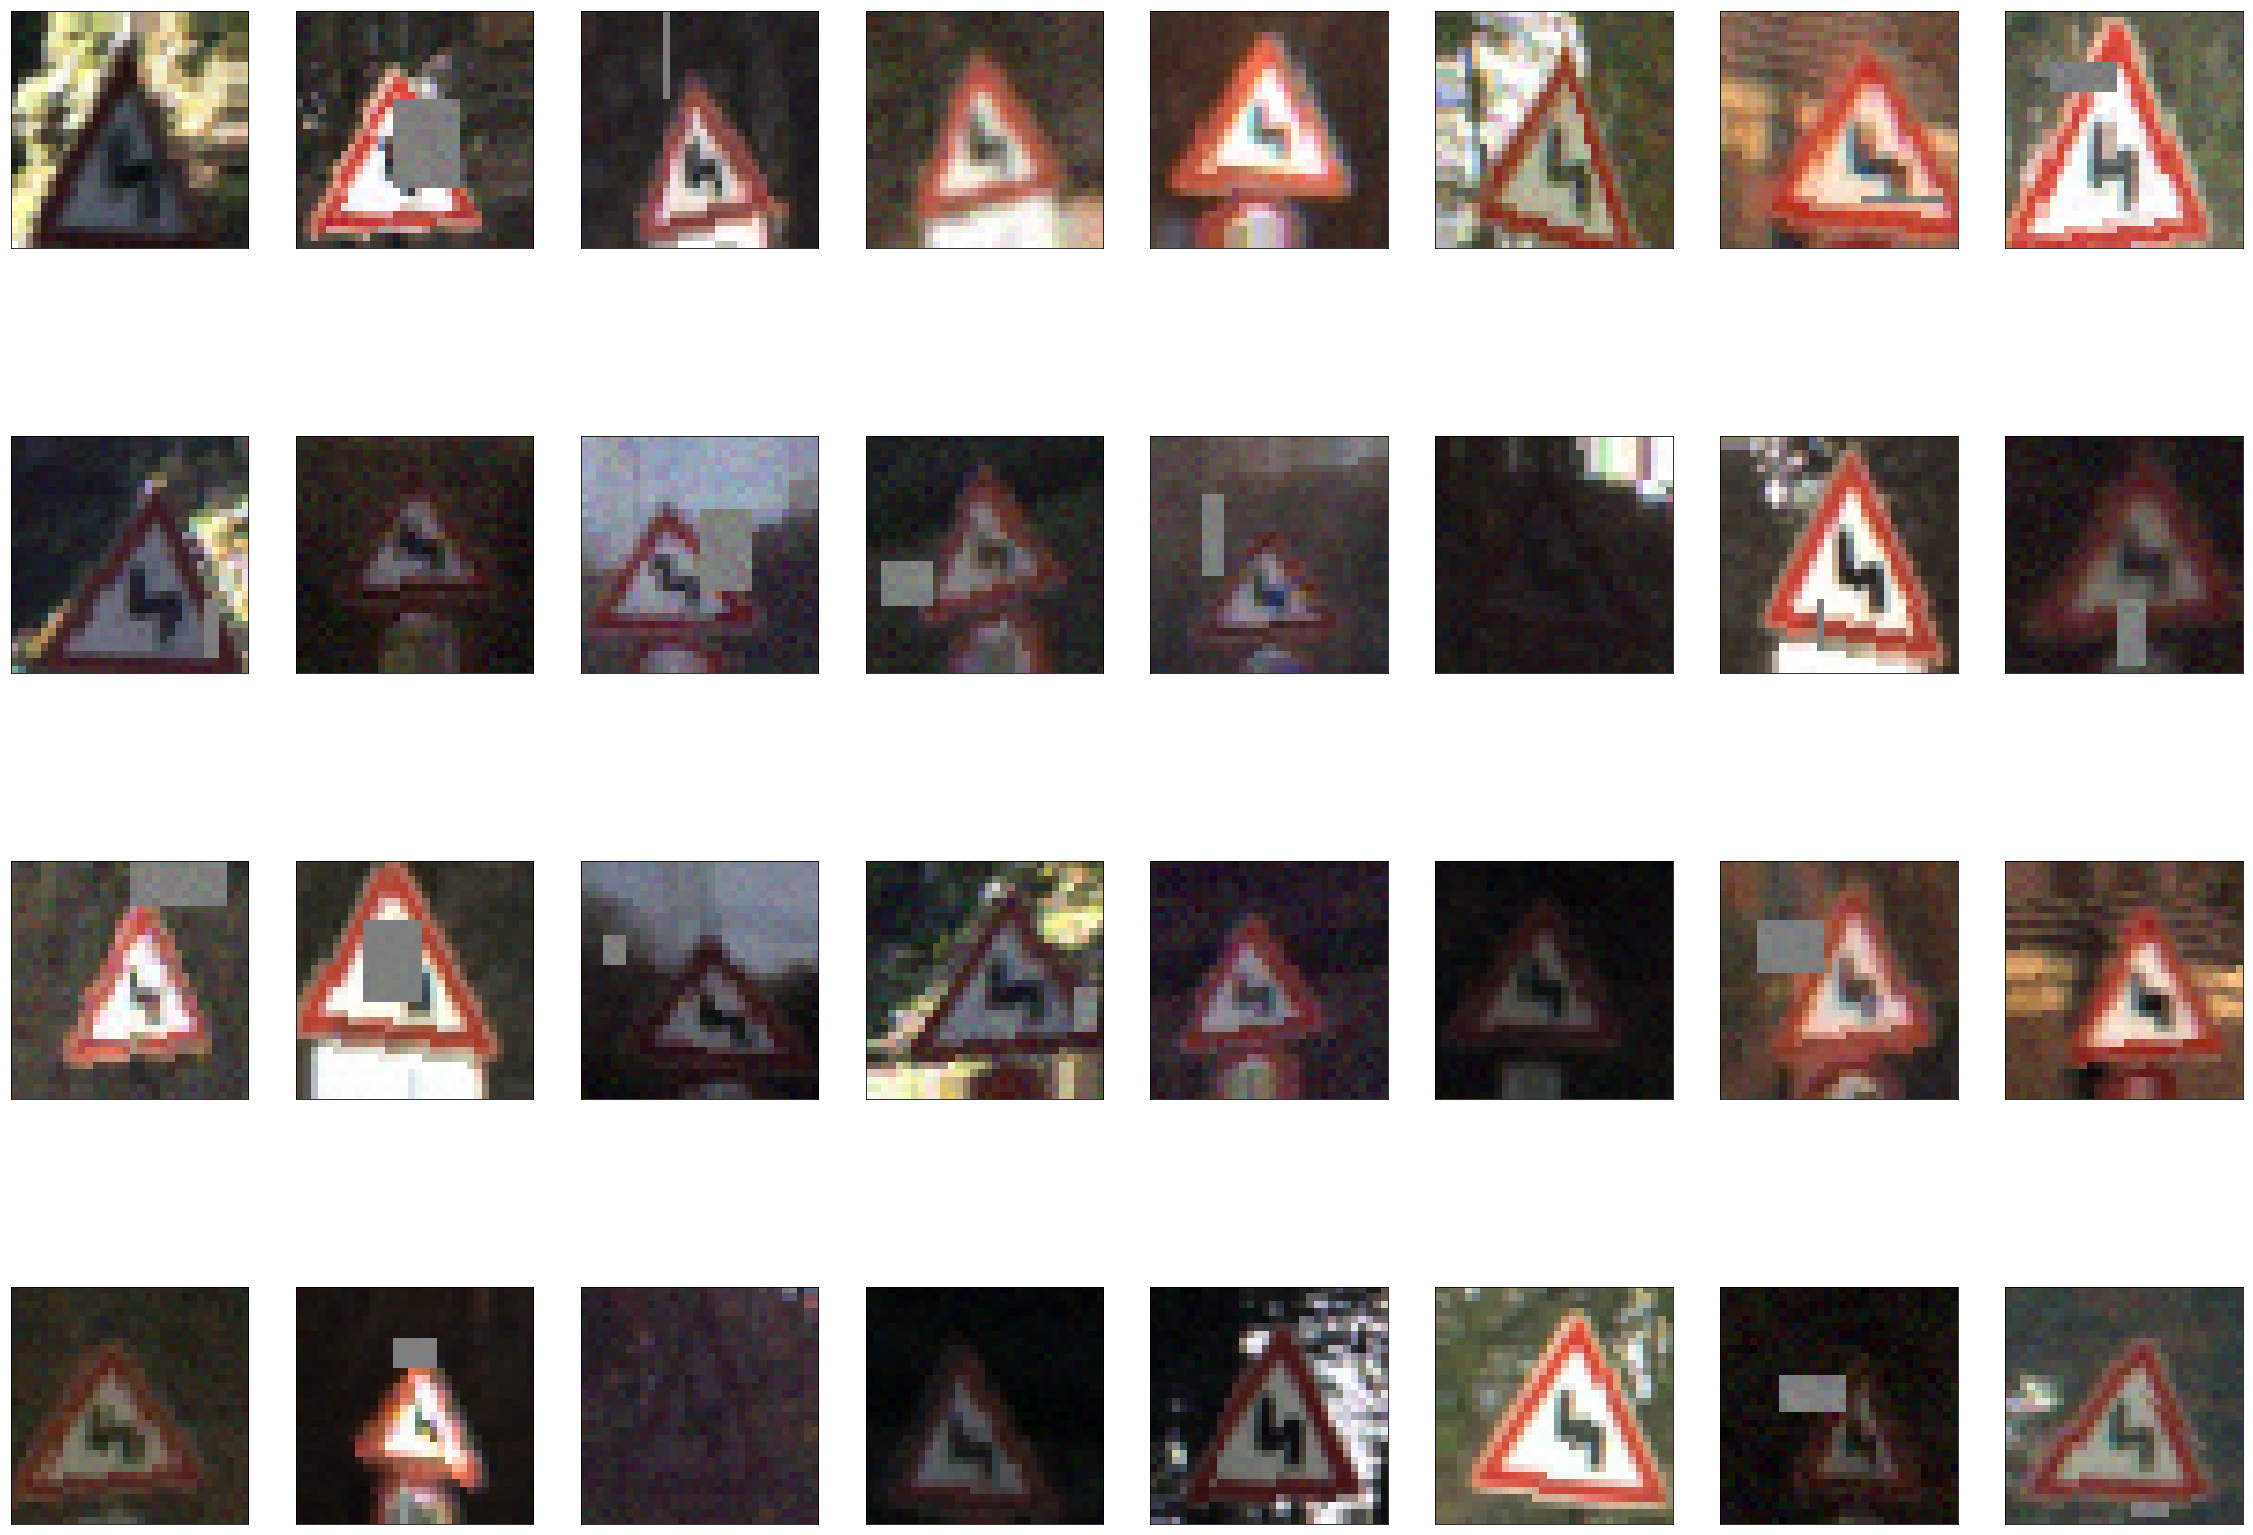

In [8]:
# creat the generator to perform online data augmentation
from keras.preprocessing.image import ImageDataGenerator

image_datagen = ImageDataGenerator(rotation_range=5.,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   channel_shift_range=5,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   preprocessing_function=DataAugumentProcess)

# take a random image from the training set
def gen_class_images_show(images,lables,class_n):
    imagemarkimg = np.copy(X_train[y_train == class_n])
    labelmarkimg = y_train[y_train == class_n] 
    
    img_rgb = imagemarkimg[0].astype(np.uint8)
    # plot the original image
    plt.figure(figsize=(2,2))
    plt.imshow(img_rgb)
    plt.title('Source of RGB image (class = {})'.format(class_n))
    plt.axis('off')
    plt.show()
    
    x = np.empty((0,32,32,3))
    y = np.empty(0,dtype='uint8')
    
    print('Generating of RGB image (class = {})'.format(class_n))
    plt.figure(figsize=(40, 30))
    for x_batch, y_batch in image_datagen.flow(imagemarkimg,labelmarkimg, batch_size=32):
#         print(x.shape)
#         print(x_batch.shape)
        x = np.concatenate((x,x_batch),axis=0)
#         print(x.shape)
        for i in range(4):
            for j in range(8):
                idx = (8*i) + j
                plt.subplot(4, 8, idx+1)
                plt.imshow(x[idx].astype(np.uint8))
                plt.xticks([])
                plt.yticks([])
        break

gen_class_images_show(X_train,y_train,21)

In [13]:
def gen_class_images(images,lables,sumclass):
    for class_n in range(0,sumclass):
        print(class_n, ': ', end='')
        imagemarkimg = images[lables == class_n]
        labelmarkimg = lables[lables == class_n] 
        n_samples = len(imagemarkimg)
        print(n_samples)
        
        n_min_samples = 3500
        batch_counter = (n_min_samples-n_samples)
        batch_size=64
        
        while( batch_counter >= 0):
            for x_batch, y_batch in image_datagen.flow(imagemarkimg, labelmarkimg,batch_size):
                images = np.concatenate((images, x_batch), axis=0)
                lables = np.concatenate((lables, y_batch), axis=0)
                
                if batch_counter < 0:
                    break
                    
                batch_counter -= batch_size
        n_samples = len(images[lables == class_n])
        batch_counter = (n_min_samples-n_samples)
        
        print('Generating samples numbers = {}'.format(n_samples))
        
    return images,lables

In [ ]:
def gen_illum_class_images(images,lables,sumclass):
    for class_n in range(0,sumclass):
        print(class_n, ': ', end='')
        imagemarkimg = images[lables == class_n]
        labelmarkimg = lables[lables == class_n] 
        n_samples = len(imagemarkimg)
        print(n_samples)
        batch_counter = 0
        
        n_min_samples = 1000
    
        if n_samples < n_min_samples:
            
            for i in range(n_min_samples-n_samples):
                    showimage = imagemarkimg[np.random.randint(n_samples)]
                    img = showimage
                    HSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
                    HSV[:,:,2] = (1.5 * np.random.random_sample(1) + 0.5)*(HSV[:,:,2])
                    img = cv2.cvtColor(HSV, cv2.COLOR_HSV2RGB )
                    
                    ret_array = []
                    ret_array.append(img)
                    img = np.array(ret_array)
                    
                    ret_array1 = []
                    ret_array1.append(class_n)
                    ll = np.array(ret_array1)
                    
                    images = np.concatenate((images, img), axis=0)
                    lables = np.concatenate((lables, ll), axis=0)
        
    return images,lables


0 : 180
Generating samples numbers = 3368
1 : 1980
Generating samples numbers = 3580
2 : 2010
Generating samples numbers = 3610
3 : 1260
Generating samples numbers = 3608
4 : 1770
Generating samples numbers = 3604
5 : 1650
Generating samples numbers = 3556
6 : 360
Generating samples numbers = 3432
7 : 1290
Generating samples numbers = 3540
8 : 1260
Generating samples numbers = 3608
9 : 1320
Generating samples numbers = 3600
10 : 1800
Generating samples numbers = 3592
11 : 1170
Generating samples numbers = 3510
12 : 1890
Generating samples numbers = 3618
13 : 1920
Generating samples numbers = 3584
14 : 690
Generating samples numbers = 3514
15 : 540
Generating samples numbers = 3432
16 : 360
Generating samples numbers = 3432
17 : 990
Generating samples numbers = 3546
18 : 1080
Generating samples numbers = 3560
19 : 180
Generating samples numbers = 3368
20 : 300
Generating samples numbers = 3428
21 : 270
Generating samples numbers = 3098
22 : 330
Generating samples numbers = 3162
23 : 450

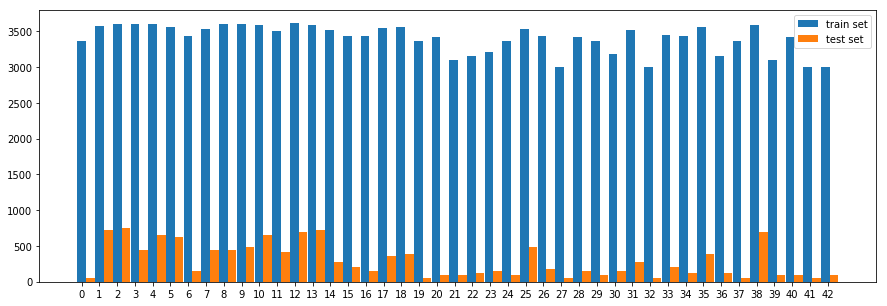

In [14]:
X_train,y_train = gen_class_images(X_train,y_train,n_classes)
coun_class_images(y_train,y_test,n_classes)

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
import cv2
from skimage import io, color, exposure, transform
from skimage import exposure
from skimage.util import random_noise

def gamma_correction(img, correction):
    img = img/255.0
    img = cv2.pow(img, correction)
    return np.uint8(img*255)

def gammaImage(img,gammarate= 0.4):
    HSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)   
    HSV[:,:,2] = gamma_correction((HSV[:,:,2]),(2*gammarate * np.random.random_sample(1) + 1-gammarate))
    img = cv2.cvtColor(HSV, cv2.COLOR_HSV2RGB )
    return img

def gaussian_blur(img, kernel_size=3):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def gaussian_noise(img):
    var = 0.001*np.random.random_sample(1)
    return 255*random_noise(img/255, mode="gaussian",var=var)

def randomerase(img, hlimt=14,wlimit=14):
    imgshape = img.shape
    h = np.random.randint(0, hlimt)
    w = np.random.randint(0, wlimit)
    x1 = np.random.randint(0, imgshape[0] - h)
    y1 = np.random.randint(0, imgshape[1] - w)
    cropimg =np.copy(img)
    cropimg[x1:x1+h, y1:y1+w,0] = 127
    cropimg[x1:x1+h, y1:y1+w,1] = 127
    cropimg[x1:x1+h, y1:y1+w,2] = 127
    return cropimg

def DataAugumentProcess(img,gammarate = 0.4,blurrate = 0.2,randomeraserte=0.5):
    img = gammaImage(img,gammarate)
    if(np.random.random_sample(1) < blurrate):
        img = gaussian_blur(img)
    if(np.random.random_sample(1) < randomeraserte):
        img = randomerase(img)   
    
    img = gaussian_noise(img)
    
    return img

def normalizeyImage(img):
    # Histogram normalization in y
#     YCrCb = cv2.cvtColor(img, cv2.COLOR_RGB2YUV )
#     YCrCb[:,:,0] = cv2.equalizeHist(YCrCb[:,:,0])
#     YCrCb[:,:,1] = cv2.equalizeHist(YCrCb[:,:,1])
#     YCrCb[:,:,2] = cv2.equalizeHist(YCrCb[:,:,2])
#     img = cv2.cvtColor(YCrCb, cv2.COLOR_YUV2RGB )
#     YCrCb = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
# #     YCrCb[:,:,0] = cv2.equalizeHist(YCrCb[:,:,0])
#     YCrCb[:,:,0] = gamma_correction((YCrCb[:,:,0]),0.2)
#     img = cv2.cvtColor(YCrCb, cv2.COLOR_YUV2RGB )

    HSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#     HSV[:,:,2] = cv2.equalizeHist(HSV[:,:,2])
#     HSV[:,:,2] = 0.8*(HSV[:,:,2])
#     HSV[:,:,2] = exposure.equalize_adapthist(HSV[:,:,2], clip_limit=0.01)    
    HSV[:,:,2] = gamma_correction((HSV[:,:,2]),1.3)
    img = cv2.cvtColor(HSV, cv2.COLOR_HSV2RGB )
    
#     img = exposure.adjust_gamma(img, gamma=2, gain=1)
#     img = exposure.adjust_log(img, gain=0.2, inv=False)
#     img = exposure.adjust_sigmoid(img, cutoff=0.5, gain=2, inv=False)


    
#     HSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#     HSV[:,:,2] = cv2.equalizeHist(HSV[:,:,2])
#     img = cv2.cvtColor(HSV, cv2.COLOR_HSV2RGB )

#     dst = gamma_correction(img, 1)
#     gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#     dst = gamma_correction(gray, 2)
    
    return img
#     return cv2.cvtColor(img, cv2.COLOR_YCrCb2GRAY)
#     return np.resize(cv2.equalizeHist(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)),(32,32,1))
    
#     return np.resize(gray ,(32,32,1))
#     return np.resize(YCrCb[:,:,0] ,(32,32,1))

def preprocessImages(images):
    ret_array = []
    for img in images:
        ret_array.append(DataAugumentProcess((img)))
    return np.array(ret_array)

X_train1 = preprocessImages(X_train[0:1000])
# X_valid1 = preprocessImages(X_valid)
# X_test1 = preprocessImages(X_test)

In [ ]:
X_train[0].shape

In [ ]:
X_train = np.concatenate((X_train, X_train1), axis=0)
y_train = np.concatenate((y_train, y_train), axis=0)

In [ ]:
show_class_images(X_train1,y_train[0:1000],n_classes)

In [ ]:
show_one_class_images(X_train1,y_train,27)

### Model Architecture

In [15]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 128

from tensorflow.contrib.layers import flatten


def LeNet2(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    keep_prob = tf.placeholder(tf.float32)
    phase = tf.placeholder(tf.bool)
    
#     x = tf.contrib.layers.batch_norm(x, center=True, scale=True, is_training=phase)

    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc01 = flatten(conv1)
    fc02 = flatten(conv2)
#     fc0   = flatten(conv2)
   
    fc0 = tf.concat([fc01, fc02],1)
    
#     fc0 = tf.concat([flatten(drop1), flatten(drop2)],1 )
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1176+400, 800), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(800))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1) 
    
#     fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(43))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    logits = fc2
#     fc2    = tf.matmul(fc1_drop, fc2_W) + fc2_b    
    # SOLUTION: Activation.
#     fc2    = tf.nn.relu(fc2)
    
# #     fc2 = tf.nn.dropout(fc2, keep_prob)

#     # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
#     fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
#     fc3_b  = tf.Variable(tf.zeros(43))
#     logits = tf.matmul(fc2, fc3_W) + fc3_b
# #     logits = tf.matmul(fc2_drop, fc3_W) + fc3_b

    return logits,keep_prob,phase

def LeNet1(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    keep_prob1 = tf.placeholder(tf.float32)
    keep_prob2 = tf.placeholder(tf.float32)
    phase = tf.placeholder(tf.bool)
    
#     x = tf.contrib.layers.batch_norm(x, center=True, scale=True, is_training=phase)
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 3, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
#     conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    conv1 = tf.nn.dropout(conv1, keep_prob2)
    
#     conv1 = tf.contrib.layers.batch_norm(conv1, center=True, scale=True, is_training=phase)

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

#     conv2 = tf.contrib.layers.batch_norm(conv2, center=True, scale=True, is_training=phase)
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    
    conv2 = tf.nn.dropout(conv2, keep_prob2)
    
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 64), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(64))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='SAME') + conv3_b
    
    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
#     conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

#     conv2 = tf.contrib.layers.batch_norm(conv2, center=True, scale=True, is_training=phase)
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    
    conv3 = tf.nn.dropout(conv3, keep_prob2)
    
    conv4_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 64), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(64))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='SAME') + conv4_b
    
    # SOLUTION: Activation.
    conv4 = tf.nn.relu(conv4)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv4 = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

#     conv2 = tf.contrib.layers.batch_norm(conv2, center=True, scale=True, is_training=phase)
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    
    conv4 = tf.nn.dropout(conv4, keep_prob2)
    
    conv5_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 128), mean = mu, stddev = sigma))
    conv5_b = tf.Variable(tf.zeros(128))
    conv5   = tf.nn.conv2d(conv4, conv5_W, strides=[1, 1, 1, 1], padding='SAME') + conv5_b
    
    # SOLUTION: Activation.
    conv5 = tf.nn.relu(conv5)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
#     conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

#     conv2 = tf.contrib.layers.batch_norm(conv2, center=True, scale=True, is_training=phase)
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    
    conv5 = tf.nn.dropout(conv5, keep_prob2)
    
    conv6_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 128, 128), mean = mu, stddev = sigma))
    conv6_b = tf.Variable(tf.zeros(128))
    conv6   = tf.nn.conv2d(conv5, conv6_W, strides=[1, 1, 1, 1], padding='SAME') + conv6_b
    
    # SOLUTION: Activation.
    conv6 = tf.nn.relu(conv6)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv6 = tf.nn.max_pool(conv6, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

#     conv2 = tf.contrib.layers.batch_norm(conv2, center=True, scale=True, is_training=phase)
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    
    conv6 = tf.nn.dropout(conv6, keep_prob2)
    
    
    fc0   = flatten(conv6)


    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(2048, 1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    fc1 = tf.nn.dropout(fc1, keep_prob1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1024, 512), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(512))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    fc2 = tf.nn.dropout(fc2, keep_prob2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(512, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
#     logits = fc2

#     regularizers = tf.nn.l2_loss(conv1_W) + tf.nn.l2_loss(conv2_W) + tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W)
#     regularizers = tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W)   
    regularizers = tf.nn.l2_loss(conv1_W) + tf.nn.l2_loss(conv2_W) + tf.nn.l2_loss(conv3_W) +\
        tf.nn.l2_loss(conv4_W) + tf.nn.l2_loss(conv5_W) + tf.nn.l2_loss(conv6_W) + tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W)+tf.nn.l2_loss(fc3_W)

    return logits,keep_prob1,keep_prob2,phase,regularizers


def LeNetorigin(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    keep_prob1 = tf.placeholder(tf.float32)
    keep_prob2 = tf.placeholder(tf.float32)
    phase = tf.placeholder(tf.bool)
    
#     x = tf.contrib.layers.batch_norm(x, center=True, scale=True, is_training=phase)
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6*4), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6*4))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    conv1 = tf.nn.dropout(conv1, keep_prob2)
    
#     conv1 = tf.contrib.layers.batch_norm(conv1, center=True, scale=True, is_training=phase)

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6*4, 16*3), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16*3))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

#     conv2 = tf.contrib.layers.batch_norm(conv2, center=True, scale=True, is_training=phase)
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    
    conv2 = tf.nn.dropout(conv2, keep_prob2)
    
    
    
    
    fc0   = flatten(conv2)


    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1200, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    fc1 = tf.nn.dropout(fc1, keep_prob1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
#     fc2 = tf.nn.dropout(fc2, keep_prob2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
#     logits = fc2

    regularizers = tf.nn.l2_loss(conv1_W) + tf.nn.l2_loss(conv2_W) + tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W)
#     regularizers = tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W)   
#     regularizers = tf.nn.l2_loss(conv1_W) + tf.nn.l2_loss(conv2_W) + tf.nn.l2_loss(conv3_W) + tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W)

    return logits,keep_prob1,keep_prob2,phase,regularizers

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits,keep_prob1,keep_prob2,phase,loss_regularizers = LeNet1(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy+ 0.001*loss_regularizers)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob1: 1.0,keep_prob2: 1.0, phase: 0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [17]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

# Best validation accuracy seen so far.
best_validation_accuracy = 0.0

start_log = EPOCHS*0.3

# Iteration-number for last improvement to validation accuracy.
last_improvement = start_log

# Stop optimization if no improvement found in this many iterations.
require_improvement = 15

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob1: 0.5,keep_prob2: 0.8,phase: 1})

        test_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1))
        print("test Accuracy = {:.3f}".format(test_accuracy))
        validation_accuracy = evaluate(X_valid, y_valid)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
        # If validation accuracy is an improvement over best-known.
        if i > start_log and validation_accuracy > best_validation_accuracy:
            # Update the best-known validation accuracy.
            best_validation_accuracy = validation_accuracy
                
            # Set the iteration for the last improvement to current.
            last_improvement = i

            # Save all variables of the TensorFlow graph to file.
            saver.save(sess, './lenet')
                
        # If no improvement found in the required number of iterations.
        if i - last_improvement > require_improvement:
            print("No improvement found in a loop, stopping optimization.")
                
            # Break out from the for-loop.
            break
        
#     saver.save(sess, './lenet')
#     print("Model saved")

# Print result.
print("best Accuracy = {:.3f} Model saved".format(best_validation_accuracy))

Training...

EPOCH 1 ...
test Accuracy = 0.025
Validation Accuracy = 0.048
EPOCH 2 ...
test Accuracy = 0.025
Validation Accuracy = 0.048
EPOCH 3 ...
test Accuracy = 0.035
Validation Accuracy = 0.053
EPOCH 4 ...
test Accuracy = 0.045
Validation Accuracy = 0.076
EPOCH 5 ...
test Accuracy = 0.048
Validation Accuracy = 0.075
EPOCH 6 ...
test Accuracy = 0.098
Validation Accuracy = 0.133
EPOCH 7 ...
test Accuracy = 0.254
Validation Accuracy = 0.332
EPOCH 8 ...
test Accuracy = 0.444
Validation Accuracy = 0.457
EPOCH 9 ...
test Accuracy = 0.683
Validation Accuracy = 0.711
EPOCH 10 ...
test Accuracy = 0.866
Validation Accuracy = 0.888
EPOCH 11 ...
test Accuracy = 0.924
Validation Accuracy = 0.950
EPOCH 12 ...
test Accuracy = 0.944
Validation Accuracy = 0.969
EPOCH 13 ...
test Accuracy = 0.960
Validation Accuracy = 0.980
EPOCH 14 ...
test Accuracy = 0.958
Validation Accuracy = 0.983
EPOCH 15 ...
test Accuracy = 0.969
Validation Accuracy = 0.986
EPOCH 16 ...
test Accuracy = 0.970
Validation Accur

KeyboardInterrupt: 

In [20]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 0.991


In [19]:
rate = 0.0001
# rate = 0.0001
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


best_validation_accuracy = 0.0

start_log = 0

# Iteration-number for last improvement to validation accuracy.
last_improvement = start_log

# Stop optimization if no improvement found in this many iterations.
require_improvement = 15

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob1: 0.5,keep_prob2: 0.9,phase: 1})

        test_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1))
        print("test Accuracy = {:.3f}".format(test_accuracy))
        validation_accuracy = evaluate(X_valid, y_valid)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
        # If validation accuracy is an improvement over best-known.
        if i > start_log and validation_accuracy > best_validation_accuracy:
            # Update the best-known validation accuracy.
            best_validation_accuracy = validation_accuracy
                
            # Set the iteration for the last improvement to current.
            last_improvement = i

            # Save all variables of the TensorFlow graph to file.
            saver.save(sess, './lenet')
                
        # If no improvement found in the required number of iterations.
        if i - last_improvement > require_improvement:
            print("No improvement found in a loop, stopping optimization.")
                
            # Break out from the for-loop.
            break
        
#     saver.save(sess, './lenet')
#     print("Model saved")

# Print result.
print("best Accuracy = {:.3f} Model saved".format(best_validation_accuracy))        

INFO:tensorflow:Restoring parameters from ./lenet
Training...

EPOCH 1 ...
test Accuracy = 0.991
Validation Accuracy = 0.996
EPOCH 2 ...
test Accuracy = 0.993
Validation Accuracy = 0.997
EPOCH 3 ...
test Accuracy = 0.993
Validation Accuracy = 0.996
EPOCH 4 ...
test Accuracy = 0.994
Validation Accuracy = 0.996
EPOCH 5 ...
test Accuracy = 0.995
Validation Accuracy = 0.997
EPOCH 6 ...
test Accuracy = 0.996
Validation Accuracy = 0.997
EPOCH 7 ...
test Accuracy = 0.996
Validation Accuracy = 0.996
EPOCH 8 ...
test Accuracy = 0.996
Validation Accuracy = 0.996
EPOCH 9 ...
test Accuracy = 0.996
Validation Accuracy = 0.996
EPOCH 10 ...
test Accuracy = 0.997
Validation Accuracy = 0.997
EPOCH 11 ...
test Accuracy = 0.996
Validation Accuracy = 0.997
EPOCH 12 ...
test Accuracy = 0.997
Validation Accuracy = 0.995
EPOCH 13 ...
test Accuracy = 0.997
Validation Accuracy = 0.997
EPOCH 14 ...
test Accuracy = 0.997
Validation Accuracy = 0.996
EPOCH 15 ...
test Accuracy = 0.997
Validation Accuracy = 0.997
E

### Analyze Model

In [21]:
y_pred = tf.nn.softmax(logits=logits)
y_pred_cls = tf.argmax(y_pred, axis=1)

def predictlable(X_data, y_data):
    num_examples = len(y_data)
    total_accuracy = 0
    ret_array = []
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        lable = sess.run(y_pred_cls, feed_dict={x: batch_x, y: batch_y,keep_prob1: 1.0,keep_prob2: 1.0, phase: 0})
        ret_array.extend(lable)
    return np.array(ret_array)

lables = []
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    lables = predictlable(X_test, y_test)
#     lables = predictlable(X_valid, y_valid)


INFO:tensorflow:Restoring parameters from .\lenet


In [22]:
def show_all_class_images(images,lables,cmap=None):
    cols = 15
    sumclass = len(images)
    rows = (sumclass+cols-1)//cols 
#     print("Random show each class from data set:")
    
    plt.figure(figsize=(30, 20))
    for i in range(sumclass):
        plt.subplot(rows, cols, i+1)
        showimage = images[i]
         # use gray scale color map if there is only one channel   
        showimage_shape = showimage.shape
        
        if len(showimage_shape) == 2: 
            cmap = "gray"
        elif  showimage_shape[2] == 1:
            showimage = showimage[:,:,0]
            cmap = "gray"
            
        plt.imshow(showimage,cmap=cmap)
        plt.title(lables[i],fontsize=30,fontweight='bold')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

incorrectly_predicted:


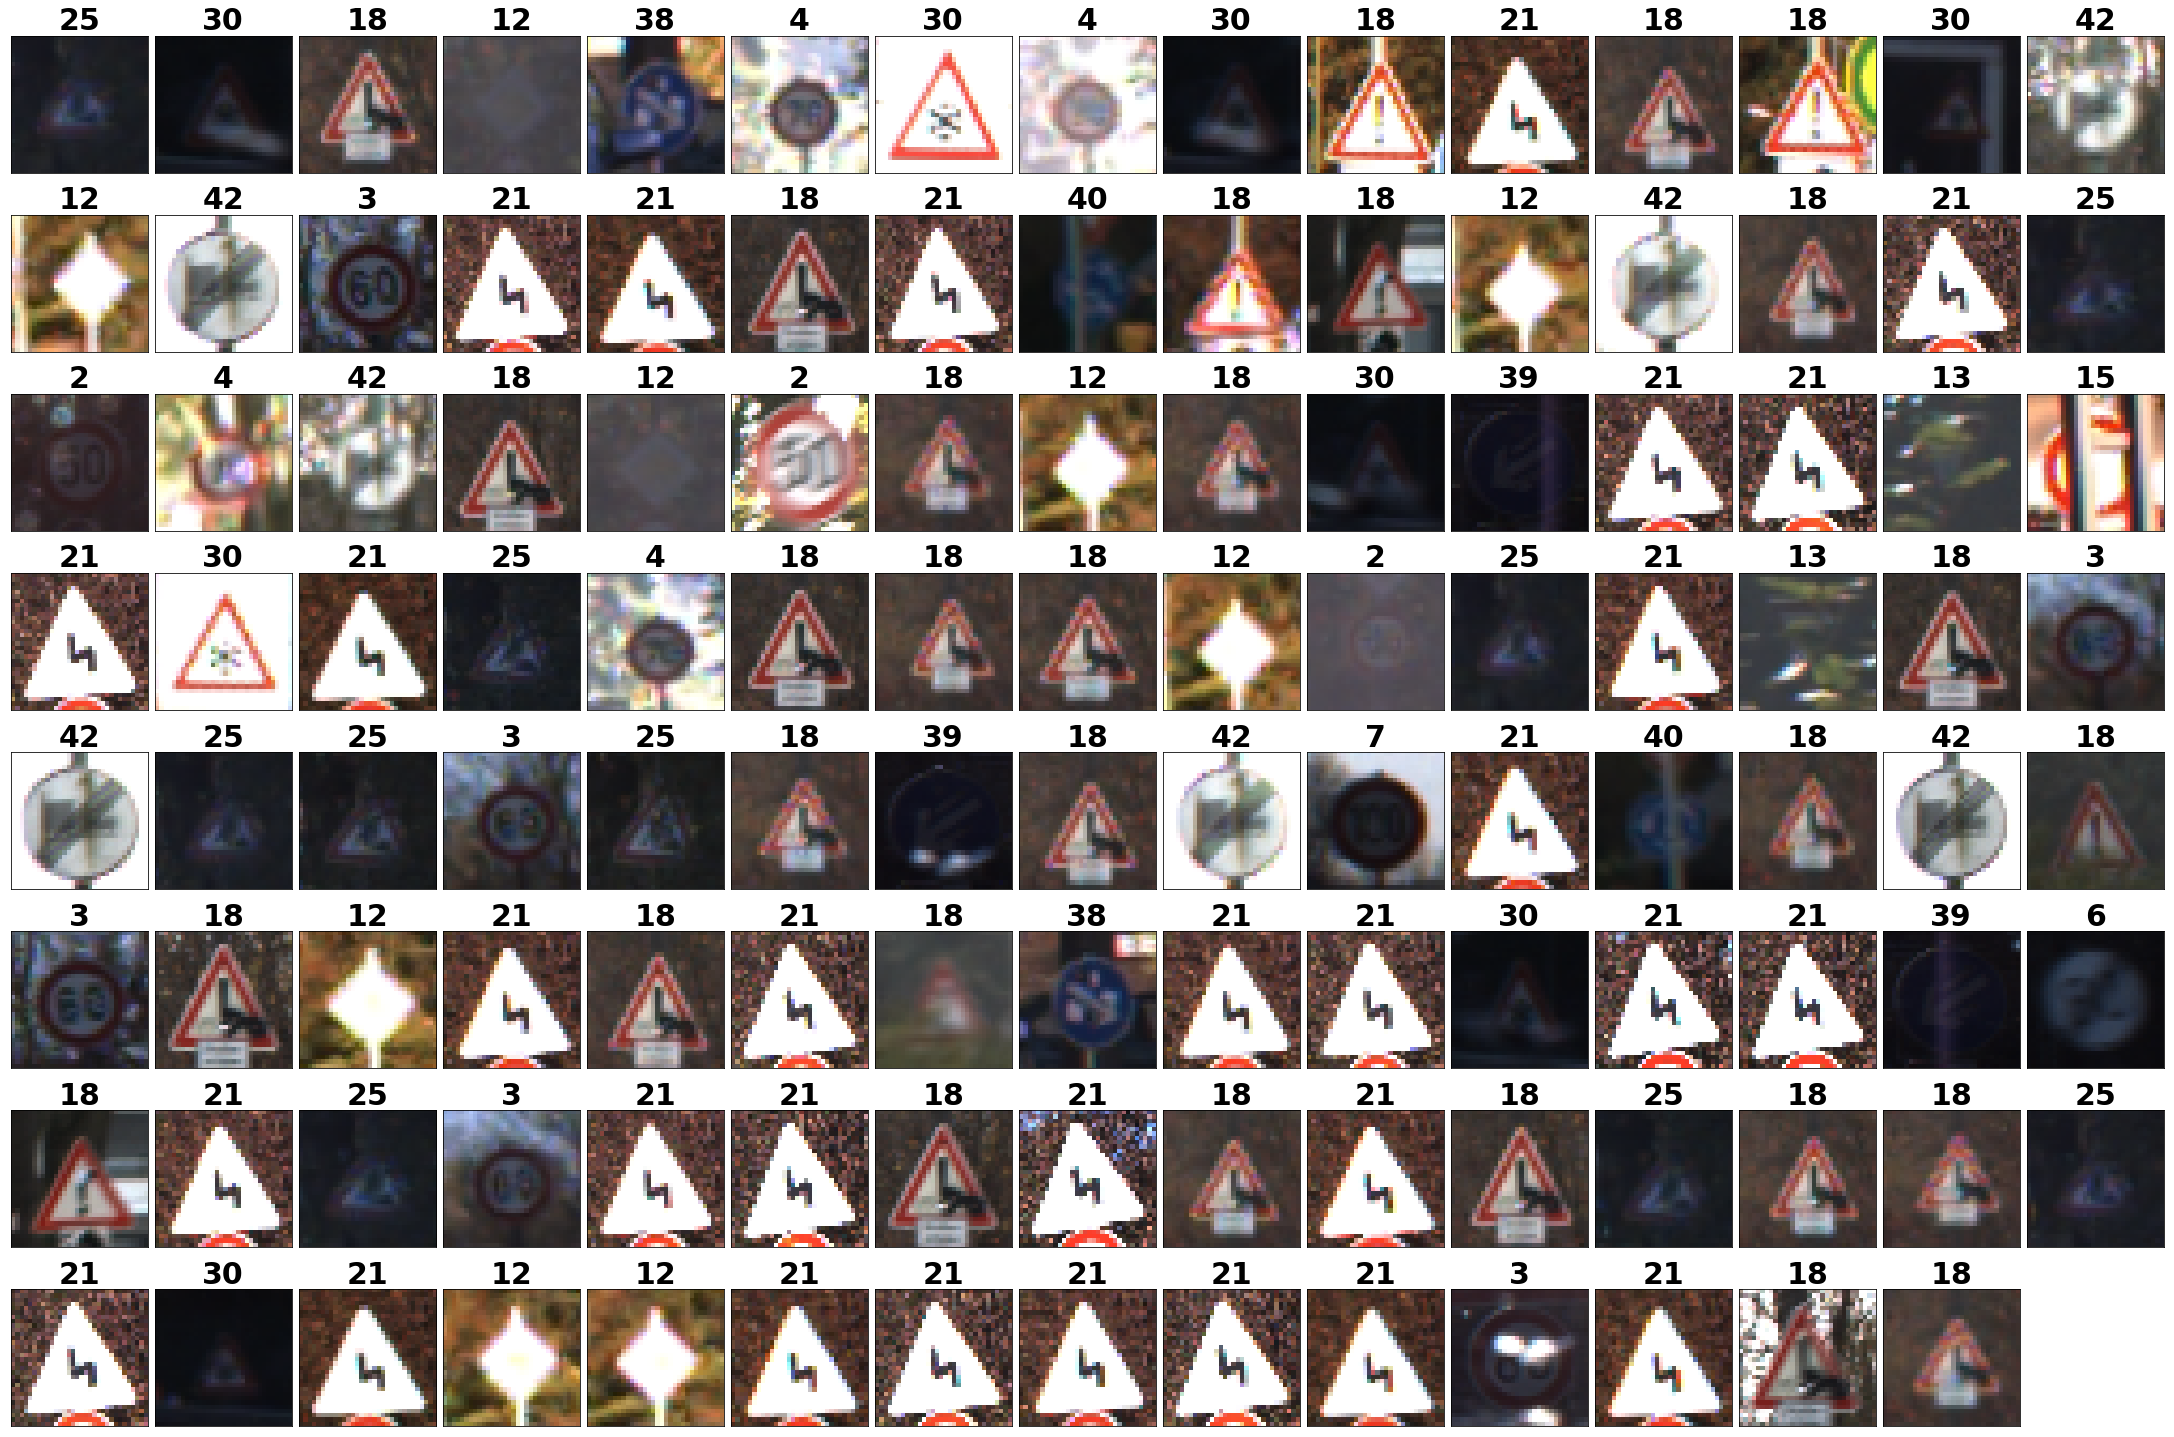

In [23]:
print("incorrectly_predicted:")
incorrectly_predictedx = X_test[y_test != lables]
incorrectly_predictedy = y_test[y_test != lables]
# incorrectly_predictedx = X_valid[y_valid != lables]
# incorrectly_predictedy = y_valid[y_valid != lables]

show_all_class_images(incorrectly_predictedx,incorrectly_predictedy)

In [ ]:
# show_one_class_images(X_valid,y_valid,18)
show_one_class_images(X_train,y_train,21)
# show_one_class_images(incorrectly_predictedx,incorrectly_predictedy,21)

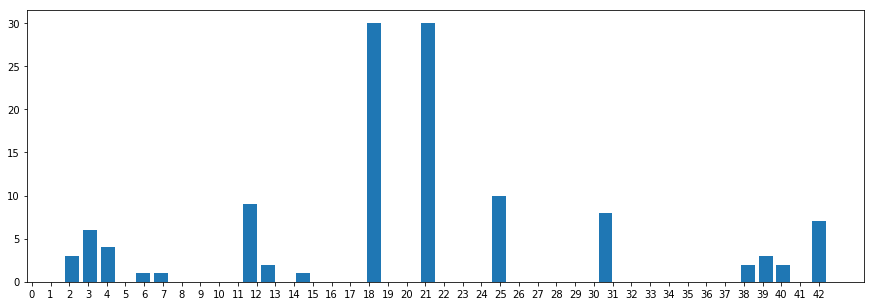

In [24]:
# histogram of label frequency
# show each class
coun_single_images(incorrectly_predictedy,n_classes)


In [ ]:
from PIL import Image
plt.imshow(incorrectly_predictedx[0])
# imgplot = plt.imshow(incorrectly_predictedx[0], interpolation="bicubic")

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

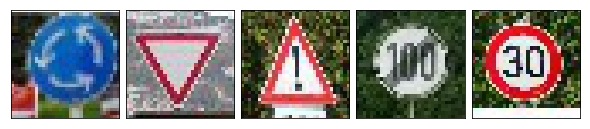

In [97]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from pandas.io.parsers import read_csv
import glob
from skimage import transform,data

def show_images(images, cmap=None):
    cols = 5
    rows = (len(images)+2)//cols 
    
    plt.figure(figsize=(8, 8))
    for i, image in enumerate(images):
        plt.subplot(rows, cols, i+1)
        # use gray scale color map if there is only one channel
        cmap = 'gray' if len(image.shape)==2 else cmap
        plt.imshow(image, cmap=cmap)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

signnames = read_csv("signnames.csv").values[:, 1]
# print(signnames)
test_images = [plt.imread(path) for path in glob.glob('test_images/*.jpg')]

show_images(test_images)


### Predict the Sign Type for Each Image

INFO:tensorflow:Restoring parameters from ./lenet


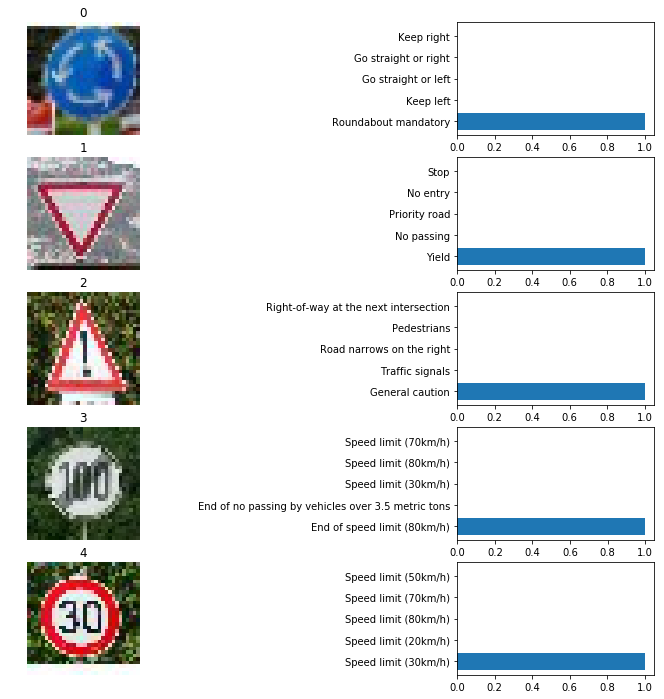

In [91]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
#Visualize new raw images

def test_net(X_data, sess): 
    prob = sess.run(tf.nn.softmax(logits), feed_dict={x: X_data,keep_prob1: 1.0,keep_prob2: 1.0, phase: 0})    
    top_5 = tf.nn.top_k(prob, k=5)
    return sess.run(top_5)


with tf.Session() as sess:
    saver.restore(sess, "./lenet")
    signs_top_5=test_net(test_images,sess)

plt.figure(figsize=(12, 12))
for i in range(5):
    plt.subplot(5, 3, 3*i+1)
    plt.imshow(test_images[i]) 
    plt.title(i)
    plt.axis('off')
    plt.subplot(5, 3, 3*i+3)
    plt.barh(np.arange(1, 6, 1), signs_top_5.values[i, :])
    labs=[signnames[j] for j in signs_top_5.indices[i]]
    plt.yticks(np.arange(1, 6, 1), labs)
plt.show()

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")